## EDA 3: Análisis exploratorio gráfico

Es el momento de hacer una buena exploración visual de los datos para entender un poquito mejor el dataset. Para ello trabajaremos con la librería matplotlib y seaborn.

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import sidetable as stb
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### Objetivos

 En el ejercicio de hoy tendremos que contestar a las siguientes preguntas:
 📌 Nota Como siempre, después de cada gráfica incluid una pequeña explicación de lo que nos está mostrando la gráfica.

#### 1. Estableced el tamaño de las figuras al inicio de vuestro jupyter para que todas tengan las mismas dimensiones.

In [41]:
plt.rcParams["figure.figsize"] = (16,8)

In [42]:
df = pd.read_csv("datos/Limpieza-2.csv", index_col=0)
df.head(2)

,type,country,activity,age,species,month,fatal,sex
year,,,,,,,,
2018,Boating,usa,Paddling,57.0,White Shark,Jun,N,F
2018,Unprovoked,brazil,Swimming,18.0,Tiger Shark,Jun,Y,M


#### 2. Manos a la obra con los plots, estos irán muy dirigidos hacia las preguntas que queremos contestar, para hacer una primera aproximación a nuestras hipótesis:

- ¿Cuántos ataques hubo por pais? ¿Se puede ver algo claro si ploteamos todos los paises? En caso de que no, seleccionad solo los 10 paises con más ataques y volved a hacer el plot.

In [43]:
# Creamos una tabla de frecuencia para ver cuántos países tenemos, y qué porcentaje ocupan cada uno:

df_attack = df.stb.freq(["country"])
df_attack

,country,count,percent,cumulative_count,cumulative_percent
0,usa,741,44.584838,741,44.584838
1,australia,343,20.637786,1084,65.222623
2,south africa,234,14.079422,1318,79.302046
3,bahamas,29,1.744886,1347,81.046931
4,new zealand,21,1.263538,1368,82.310469
...,...,...,...,...,...
90,between portugal & india,1,0.060168,1658,99.759326
91,belize,1,0.060168,1659,99.819495
92,bahrein,1,0.060168,1660,99.879663
93,asia?,1,0.060168,1661,99.939832


Hay muchos países dónde solo se ha realizado un ataque, por lo que plotear todos los países sería ineficiente para hacer una representación gráfica entendible.

In [44]:
# Nos quedamos con los 10 países mas peligrosos:

df_10 = df_attack.iloc[:10]
df_10['country'].unique()

array(['usa', 'australia', 'south africa', 'bahamas', 'new zealand',
       'reunion', 'papua new guinea', 'brazil', 'mexico', 'italy'],
      dtype=object)

In [45]:
# Creamos una lista:

lista_paises = list(df_10['country'].unique())
lista_paises

['usa',
 'australia',
 'south africa',
 'bahamas',
 'new zealand',
 'reunion',
 'papua new guinea',
 'brazil',
 'mexico',
 'italy']

In [46]:
# Utilizamos el método isin para quedarnos sólo los registros que coincidan con nuestra lista de países:

df_country = df[df["country"].isin(lista_paises)]
df_country['country'].unique()

array(['usa', 'brazil', 'australia', 'south africa', 'bahamas',
       'new zealand', 'reunion', 'mexico', 'italy', 'papua new guinea'],
      dtype=object)

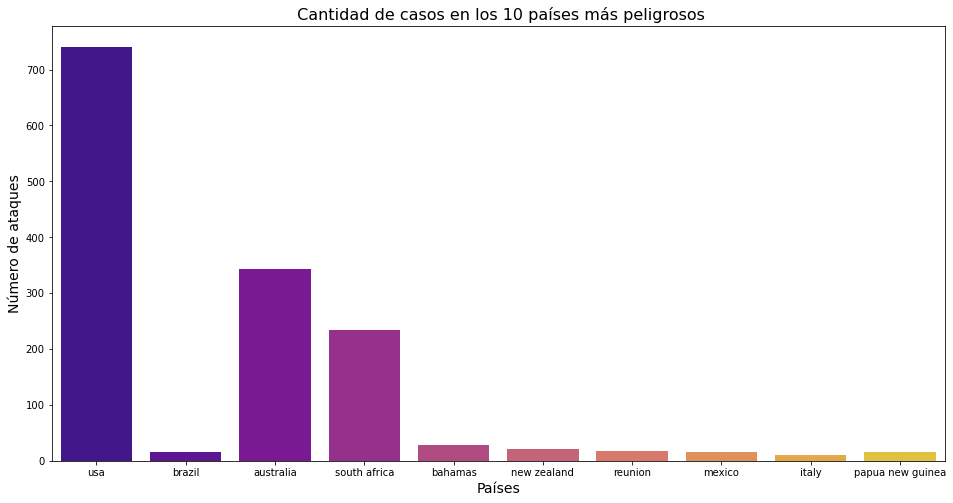

In [47]:
sns.countplot(x = df_country['country'], palette = "plasma")

plt.title(" Cantidad de casos en los 10 países más peligrosos", fontsize = 16)
plt.xlabel("Países", fontsize = 14)
plt.ylabel("Número de ataques", fontsize = 14)

plt.show()

- Usando el DataFrame de los 10 paises con más ataques, ¿hay diferencias entre sexos en esos paises?

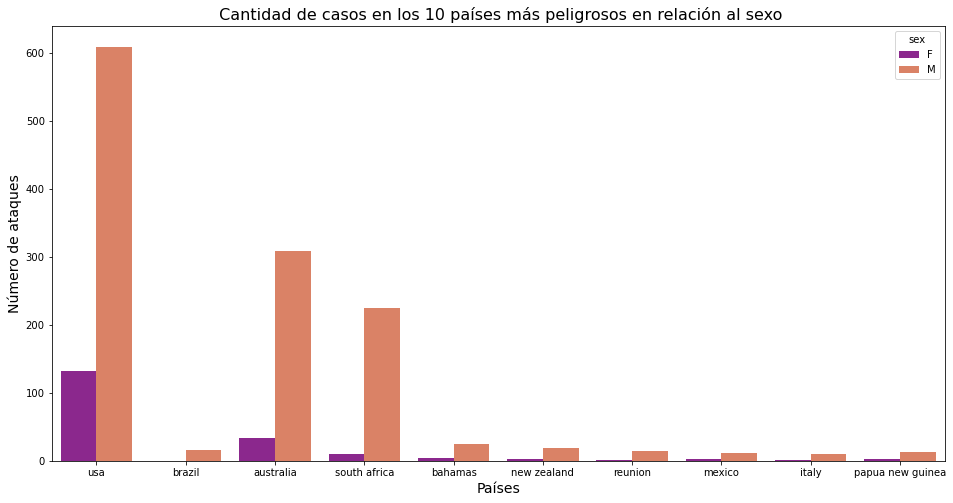

In [48]:
sns.countplot(x = df_country['country'], hue = df_country["sex"], palette = 'plasma')

plt.title(" Cantidad de casos en los 10 países más peligrosos en relación al sexo", fontsize = 16)
plt.xlabel("Países", fontsize = 14)
plt.ylabel("Número de ataques", fontsize = 14)

plt.show()

- ¿Qué edad recibe mayor número de ataques? 

💡 Pista 💡 Para que esta gráfica nos salga legible tendremos que crear antes grupos de edad. Para hacer esto de una forma sencilla tenemos el método pd.cut() que aprendimos en la lección de Limpieza II.

In [49]:
# Utilizamos el método cut para separar nuestros registros en 4 rangos de edad, por el momento les llamamos Grupo X, porqué aún no sabemos dónde hará el corte:

df_country['range'] = pd.cut(x = df_country['age'], bins = 4, labels = ['Grupo A', 'Grupo B', 'Grupo C', 'Grupo D'])
df_country.head()

,type,country,activity,age,species,month,fatal,sex,range
year,,,,,,,,,
2018,Boating,usa,Paddling,57.0,White Shark,Jun,N,F,Grupo C
2018,Unprovoked,brazil,Swimming,18.0,Tiger Shark,Jun,Y,M,Grupo A
2018,Unprovoked,usa,Walking,15.0,Bull Shark,May,N,M,Grupo A
2018,Provoked,australia,Feeding sharks,32.0,Grey Shark,May,N,M,Grupo B
2018,Unprovoked,australia,Surfing,60.0,Unspecified,Apr,N,M,Grupo C


In [50]:
# Comprobamos qué rango de edad agrupa cada grupo:

grupo_A = df_country[(df_country['range'] == "Grupo A")]
grupo_A["age"].unique()

array([18., 15., 19., 10., 20., 13., 17., 21.,  6., 22., 23., 12., 11.,
        9., 14., 16.,  7., 24.,  8.,  5.])

In [51]:
grupo_B = df_country[(df_country['range'] == "Grupo B")]
grupo_B["age"].unique()

array([32., 33., 25., 35., 31., 40., 37., 34., 28., 36., 42., 27., 29.,
       39., 43., 44., 38., 26., 41., 30.])

In [52]:
grupo_C = df_country[(df_country['range'] == "Grupo C")]
grupo_C["age"].unique()

array([57., 60., 55., 54., 50., 46., 48., 58., 51., 61., 59., 62., 52.,
       47., 63., 53., 45., 64., 56., 49.])

In [53]:
grupo_D = df_country[(df_country['range'] == "Grupo D")]
grupo_D["age"].unique()

array([69., 65., 73., 71., 68., 70., 66., 74., 77., 84., 67.])

In [54]:
# Repetimos el método cut para que sea más eficiente y legigle a la hora de analizar los datos:

df_country['range'] = pd.cut(x = df_country['age'], bins = 4, labels = ['0-24', '25-44', '45-64', '65-90'])
df_country.head()

,type,country,activity,age,species,month,fatal,sex,range
year,,,,,,,,,
2018,Boating,usa,Paddling,57.0,White Shark,Jun,N,F,45-64
2018,Unprovoked,brazil,Swimming,18.0,Tiger Shark,Jun,Y,M,0-24
2018,Unprovoked,usa,Walking,15.0,Bull Shark,May,N,M,0-24
2018,Provoked,australia,Feeding sharks,32.0,Grey Shark,May,N,M,25-44
2018,Unprovoked,australia,Surfing,60.0,Unspecified,Apr,N,M,45-64


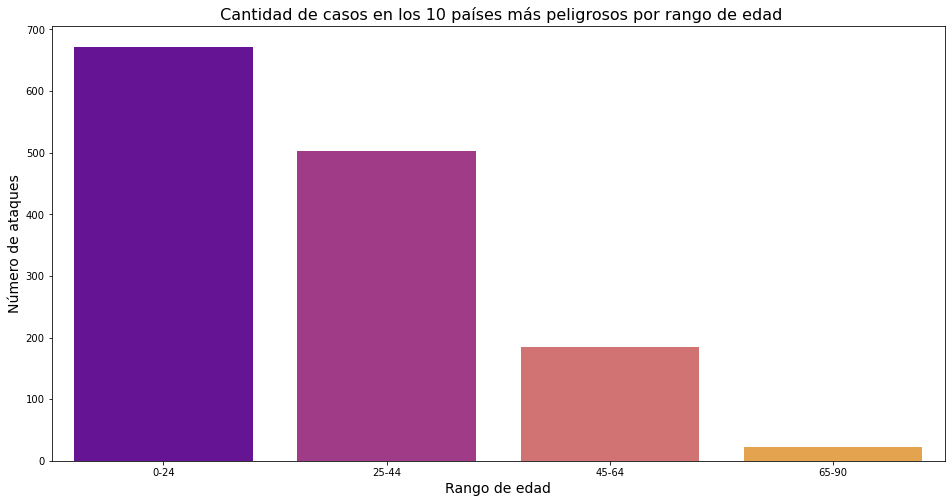

In [55]:
sns.countplot(x = df_country['range'], palette= 'plasma')

plt.title(" Cantidad de casos en los 10 países más peligrosos por rango de edad", fontsize = 16)
plt.xlabel("Rango de edad", fontsize = 14)
plt.ylabel("Número de ataques", fontsize = 14)

plt.show()

- Ataques entre sexos, ¿hay diferencia?

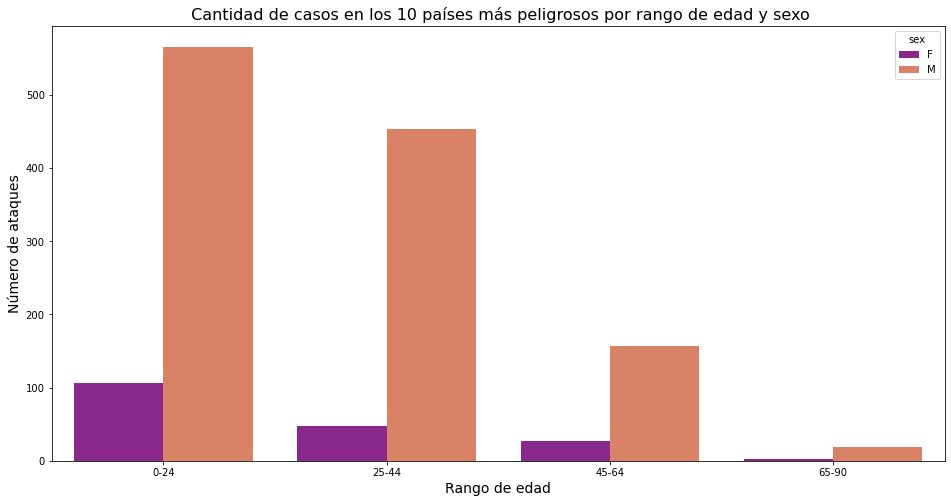

In [56]:
sns.countplot(x = df_country['range'], hue = df_country['sex'], palette = 'plasma')

plt.title(" Cantidad de casos en los 10 países más peligrosos por rango de edad y sexo", fontsize = 16)
plt.xlabel("Rango de edad", fontsize = 14)
plt.ylabel("Número de ataques", fontsize = 14)

plt.show()

- ¿Cuando ocurren más ataques? ¿Os sale algo raro en la gráfica? Intentad limpiar un poco los datos para que os salga mejor.

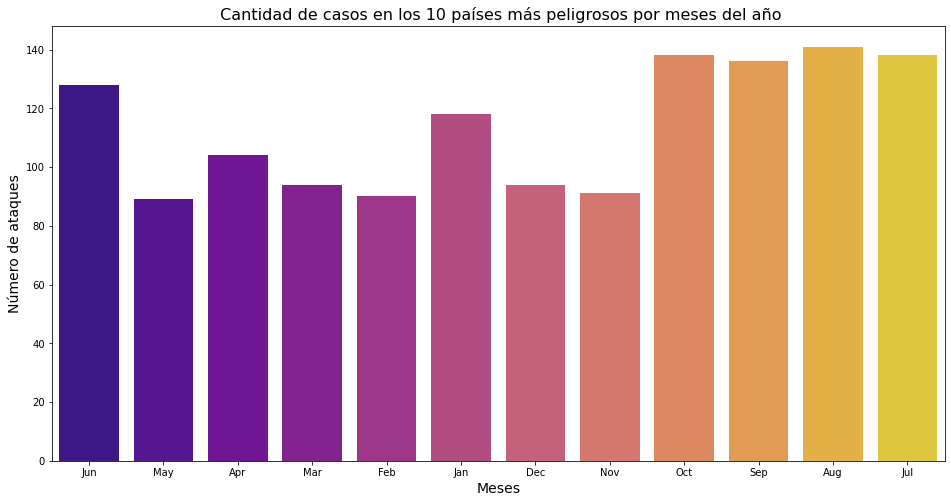

In [57]:
sns.countplot(x = df_country['month'], palette = 'plasma')

plt.title(" Cantidad de casos en los 10 países más peligrosos por meses del año", fontsize = 16)
plt.xlabel("Meses", fontsize = 14)
plt.ylabel("Número de ataques", fontsize = 14)

plt.show()

Podríamos hacer más gráficas para seguir explorando nuestras hipótesis, pero tenemos el tiempo limitado 😢. Aún así, sentiros libres de explorar todo lo que queráis vuestros datos para entenderlos mejor 😉.